#  Sentiment analysis of Thread app

# Importing necessaries libraries

In [4]:
import numpy as np
import pandas as pd
from  textblob import TextBlob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [6]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\dataset\37000_reviews_of_thread_app.csv')
df

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36938,1995,App Store,d0503900-7c8b-4cf3-8f16-1a628f25d99b,Ileila888,Hybrid of IG and Twitter with 0 UVP,Threads have mediocre UX with 0 unique value p...,2,NaN,2023-07-06 00:37:57,NaN,NaN,NaN,en,us
36939,1996,App Store,d55529a3-42b9-4a55-a17c-b49f30d7b419,MaxW239,Outstanding,Twitter (Instagram’s Version),5,NaN,2023-07-06 00:00:39,NaN,NaN,NaN,en,us
36940,1997,App Store,8818ddd0-1ce4-4d82-b0df-b43a6c68ff81,Anne Marie C,Let the battle begin!,😂😂😂,5,NaN,2023-07-05 23:16:15,NaN,NaN,NaN,en,us
36941,1998,App Store,81561238-d8c1-467d-b9dc-be25d64a1aa7,alexcookiedough92,No search bar??,How do you expect a social media app to succee...,1,NaN,2023-08-06 12:31:54,NaN,NaN,NaN,en,us


# Shape of dataset

In [7]:
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in dataset')

There are 36943 rows and 14 columns in dataset


In [ ]:
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in dataset')
print(f"There are {df.duplicated().sum()} duplicate values")
df.isna().sum()
df['rating'].value_counts()

# Identify and remove duplicate values

In [8]:
print(f"There are {df.duplicated().sum()} duplicate values")

There are 0 duplicate values


# Identify and remove null values

In [9]:
df.isna().sum()

Unnamed: 0                     0
source                         0
review_id                      0
user_name                      0
review_title               34943
review_description             0
rating                         0
thumbs_up                   2000
review_date                    0
developer_response         36943
developer_response_date    36943
appVersion                 12088
laguage_code                   0
country_code                   0
dtype: int64

In [28]:
df['rating'].value_counts()

5    17000
1    11282
4     3588
3     2956
2     2117
Name: rating, dtype: int64

In [29]:
df['thumbs_up'].value_counts()

0.0      30611
1.0       2889
2.0        520
3.0        193
4.0        124
         ...  
164.0        1
91.0         1
547.0        1
268.0        1
114.0        1
Name: thumbs_up, Length: 149, dtype: int64

<AxesSubplot: title={'center': 'count for ratings'}>

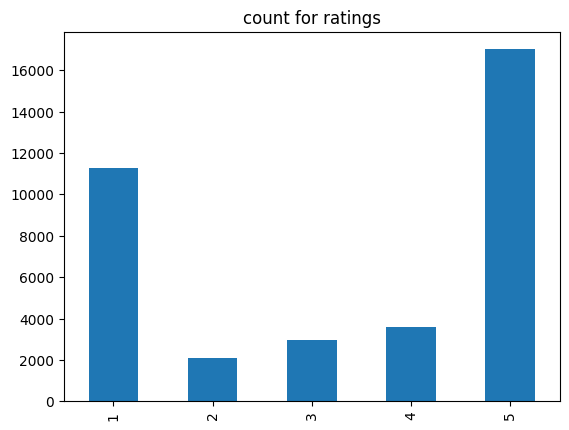

In [30]:
df['rating'].value_counts().sort_index().plot(kind='bar',title = 'count for ratings')

# Droping unnecessary columns

In [10]:
df.drop(['review_title','developer_response','developer_response_date','review_id','user_name','appVersion','appVersion','laguage_code','country_code','review_date','Unnamed: 0'],axis=1,inplace = True)

# Reset the index of dataset

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df.head()

,source,review_description,rating,thumbs_up
0,Google Play,Good,5,0.0
1,Google Play,Weak copy of Twitter,1,0.0
2,Google Play,i wish threads have a save button for images a...,3,0.0
3,Google Play,Love it,5,0.0
4,Google Play,Very god,5,0.0


# Dataset Description 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36943 entries, 0 to 36942
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              36943 non-null  object 
 1   review_description  36943 non-null  object 
 2   rating              36943 non-null  int64  
 3   thumbs_up           34943 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,36943.0,3.349376,1.759170,1.0,1.0,4.0,5.0,5.0
thumbs_up,34943.0,1.816845,58.538839,0.0,0.0,0.0,0.0,5557.0


In [15]:
df.describe(include = 'object').T

,count,unique,top,freq
source,36943,2,Google Play,34943
review_description,36943,30086,Good,877


# Sentiment Analysis using textblob

# Function to classify Sentiment Score

In [16]:
def analyze(x):
    if x>=0.5:
        return 'Positive'
    elif x<=-0.5:
        return 'Negative'
    else:
        return 'Neutral'
    

# Function to calculate sentiment score

In [17]:
def score(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [18]:
df['score'] = df['review_description'].apply(score)
df['analysis'] = df['score'].apply(analyze)

In [19]:
df.head()

,source,review_description,rating,thumbs_up,score,analysis
0,Google Play,Good,5,0.0,0.700,Positive
1,Google Play,Weak copy of Twitter,1,0.0,-0.375,Neutral
2,Google Play,i wish threads have a save button for images a...,3,0.0,0.000,Neutral
3,Google Play,Love it,5,0.0,0.500,Positive
4,Google Play,Very god,5,0.0,0.200,Neutral


# Sentiment Analysis of rating column

In [20]:
def rating(x):
    
    if x>=4:
        return 'Positive'
    elif x<=2:
        return 'Negative'
    else:
        return 'Neutral'
    

In [21]:
df['rating_analysis'] = df['rating'].apply(rating)

In [22]:
df.head()

,source,review_description,rating,thumbs_up,score,analysis,rating_analysis
0,Google Play,Good,5,0.0,0.700,Positive,Positive
1,Google Play,Weak copy of Twitter,1,0.0,-0.375,Neutral,Negative
2,Google Play,i wish threads have a save button for images a...,3,0.0,0.000,Neutral,Neutral
3,Google Play,Love it,5,0.0,0.500,Positive,Positive
4,Google Play,Very god,5,0.0,0.200,Neutral,Positive


# Final comparision of both column and classification

In [23]:
df['final_rating'] = 'Positive'

In [24]:
for i in range(len(df)):
    if (df['analysis'][i]=='Positive' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'
        
    elif (df['analysis'][i] == 'Positive' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Positive'):
        df['final_rating'][i] = 'Positive'
        
    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Neutral')or (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Negative'
        
    elif (df['analysis'][i] == 'Neutral' and df['rating_analysis'][i] == 'Neutral'):
        df['final_rating'][i] = 'Neutral'
   
    elif (df['analysis'][i] == 'Negative' and df['rating_analysis'][i] == 'Negative'):
        df['final_rating'][i] = 'Negative'
        
    else:
        df['final_rating'][i] = 'Neutral'

In [25]:
df.head()

,source,review_description,rating,thumbs_up,score,analysis,rating_analysis,final_rating
0,Google Play,Good,5,0.0,0.700,Positive,Positive,Positive
1,Google Play,Weak copy of Twitter,1,0.0,-0.375,Neutral,Negative,Negative
2,Google Play,i wish threads have a save button for images a...,3,0.0,0.000,Neutral,Neutral,Neutral
3,Google Play,Love it,5,0.0,0.500,Positive,Positive,Positive
4,Google Play,Very god,5,0.0,0.200,Neutral,Positive,Positive


In [26]:
df['final_rating'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [23]:
df.describe(include='object')

,source,review_description,analysis,rating_analysis,final_rating
count,36943,36943,36943,36943,36943
unique,2,30086,3,3,3
top,Google Play,Good,Neutral,Positive,Positive
freq,34943,877,24360,20588,20998


<AxesSubplot: xlabel='final_rating', ylabel='count'>

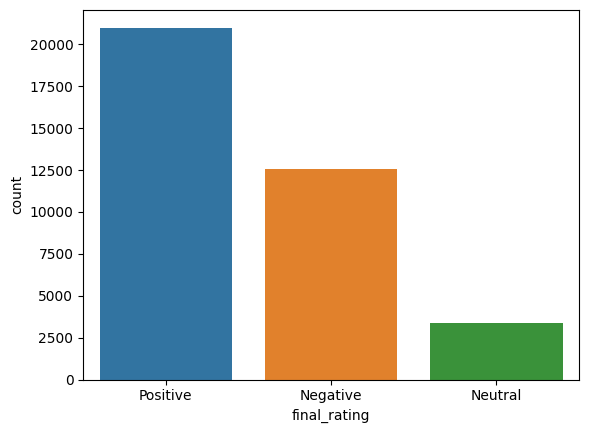

In [27]:
sns.countplot(x='final_rating',data=df)

In [7]:
import pandas as pd
df =pd.read_csv(r'C:\Users\Lenovo\Downloads\CAP_002401.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Downloads\\CAP_002401.csv'

# Conclusion:

## From above analysis it is clear that the thread app is liked by most of the user and popular among user.

#### If you like my work then upvote me 😊. Thankyou !!! 